In [1]:
from pymopt.voxel import VoxelDicomModel

In [21]:
dr = 0.1
nr = 20
np.array([(i)*dr for i in np.arange(nr+1)]).shape

(21,)

In [18]:
np.arange(-2,2)

array([-2, -1,  0,  1])

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
res = dcm.getResult()
fig = plt.figure(figsize=(10,6),dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
Rd_index = np.where(res['v'][2]<0)[0]
y = res['p'][1,Rd_index]
x = res['p'][0,Rd_index]
H = ax.hist2d(x,y, bins=2**10,cmap="plasma",norm=colors.LogNorm())
ax.set_title('hist map @ ')
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
fig.colorbar(H[3],ax=ax)
plt.show()

In [18]:
from pymopt.voxel import VoxelPlateModel
model_params = {
    'nPh': 100000,
    'fluence_mode': '3D',
    'nr': 100,
    'nz': 100,
    'dr': 0.1,
    'dz': 0.1,
}

print("######  n = 1.  ######")
params = {
    'thickness':[200],
    'ms':[100],
    'ma':[0.1],
    'g':[0.9],
    'n':[1.],
    'n_air':1.,
    'xy_size':20,
    'voxel_space':0.1,
}
model = VoxelPlateModel(**model_params)
model.build(**params)
model.start()
fluenceA = model.get_fluence()

######  n = 1.  ######
Memory area size for fluence storage: 16 Mbyte
Memory area size for voxel storage: 81.690 Mbyte

###### Start ######

Progress: 0.607 [％]
Calculation time: 0 minutes 0.222 seconds.

Progress: 1.961 [％]
Calculation time: 0 minutes 0.447 seconds.

Progress: 5.011 [％]
Calculation time: 0 minutes 0.910 seconds.

Progress: 11.757 [％]
Calculation time: 0 minutes 1.827 seconds.

Progress: 24.712 [％]
Calculation time: 0 minutes 3.445 seconds.

Progress: 41.086 [％]
Calculation time: 0 minutes 6.058 seconds.

Progress: 56.091 [％]
Calculation time: 0 minutes 9.936 seconds.

Progress: 68.021 [％]
Calculation time: 0 minutes 15.722 seconds.

Progress: 77.053 [％]
Calculation time: 0 minutes 24.269 seconds.

Progress: 83.587 [％]
Calculation time: 0 minutes 36.820 seconds.

Progress: 88.353 [％]
Calculation time: 0 minutes 55.958 seconds.

Progress: 91.745 [％]
Calculation time: 1 minutes 26.096 seconds.

Progress: 94.191 [％]
Calculation time: 2 minutes 12.441 seconds.

Progress: 9

In [23]:
fluenceA["Arz"].shape

(200, 200, 100)

In [24]:
fluenceA["r"].shape

(100,)

In [25]:
import numpy as np
dr=0.1
nr=100
rr = np.array([(i+0.5)*dr for i in np.arange(-nr,nr)])

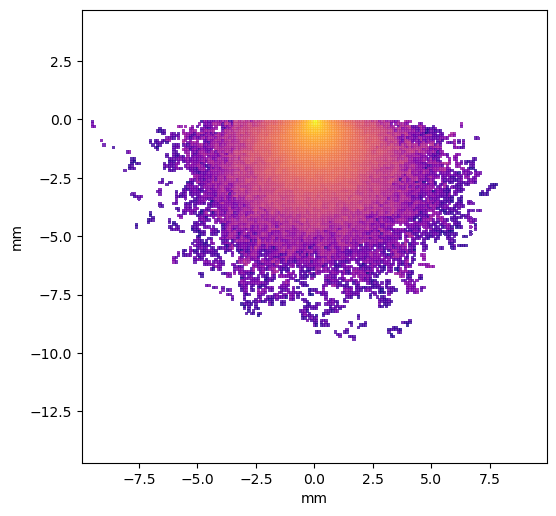

In [28]:
import matplotlib.pyplot as plt
from matplotlib import colors
plt.figure(figsize=(6,6),dpi=100)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.get_cmap("plasma"))
plt.pcolormesh( rr,fluenceA['z']*-1,fluenceA["Arz"][:,100,:].T,norm=colors.LogNorm(),alpha = 0.8)
plt.xlabel("mm")
plt.ylabel("mm")
plt.show()

In [31]:
model.fluence_mode

'3D'

In [30]:
aa = False
if ~aa:
    print("AA")
else:
    print("BB")

AA


In [2]:
dcm = VoxelDicomModel()

In [3]:
path = './DICOMfile9'
dcm.import_dicom(path)

ConstPixelDims: (1024, 1024, 88)
ConstPixelSpacing: (0.0274828696451, 0.0274828696451, 0.0274828696451)
Data infomation
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9110..1.1.201701271710060237
(0008, 0020) Study Date                          DA: '20170127'
(0008, 0021) Series Date                         DA: '20170127'
(0008, 0022) Acquisition Date                    DA: '20170127'
(0008, 0023) Content Date                        DA: '20170127'
(0008, 0030) Study Time                          TM: '165759.0000'
(0008, 0031) Series Time                         TM: '165759.0000'
(0008, 0032) Acquisition Time                    TM: '165759.0000'
(0008, 0033) Content Time                        TM: '171006.0237'
(0008, 0050) Accession Numb

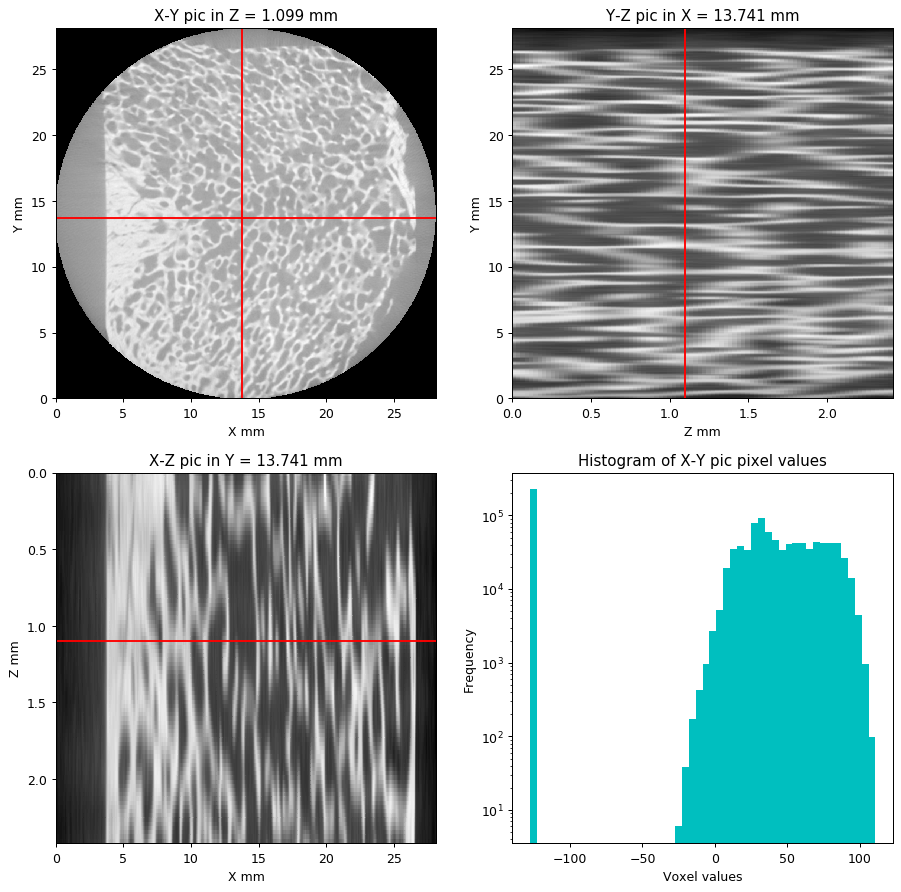

In [4]:
dcm.display_cross_section(xx = 500,yy = 500,zz = 40,cmap = 'gray')

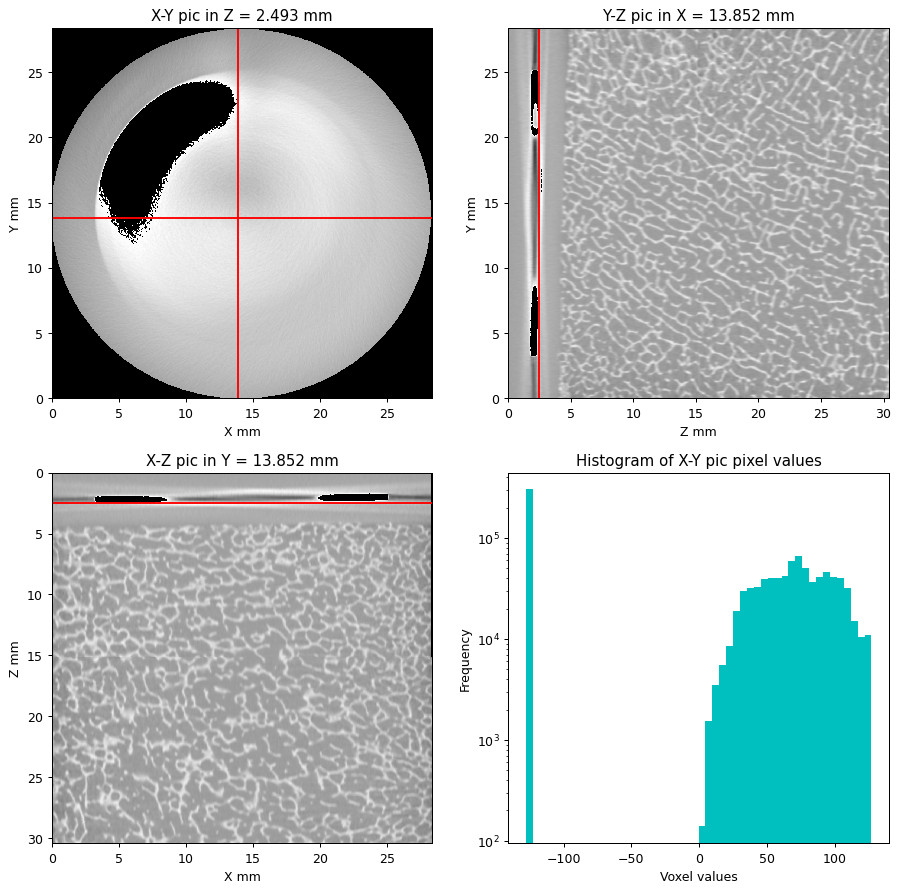

In [5]:
dcm.rot180_y()
dcm.display_cross_section(xx = 500,yy = 500,zz = 90,graph_type = 'ALL',cmap = 'gray')
#dcm.set_threshold()

Trimming parameters
              right left upper lower    top bottom
Pixel number      0    0     0     0    176      0
Position [mm]     0    0     0     0  4.876      0


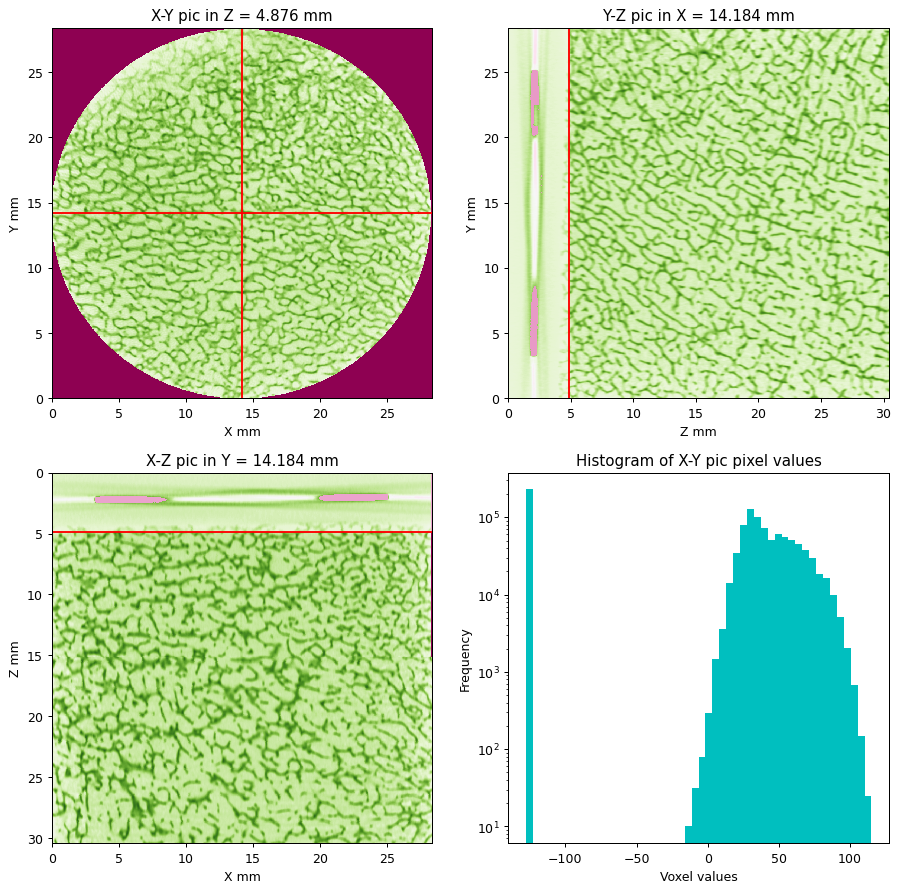

In [6]:
trim_params = {
    'int_pix':False,
    'right': 0,
    'left': 0,
    'upper': 0,
    'lower':0,
    'top':4.9,
    'bottom':0,
    'cmap':'PiYG',
}
dcm.trim_area(**trim_params)

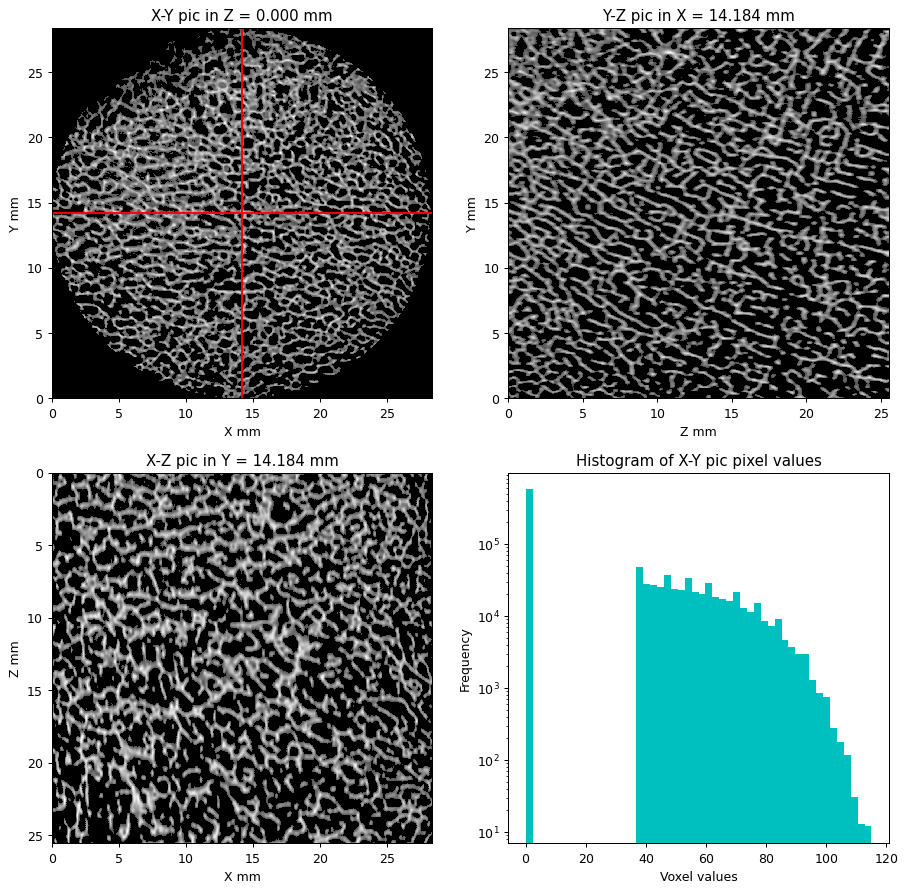

#########  Size  #########
* Image shape was changed
  from (1024,1024,1098)
  to   (1024,1024,922)

* Memory area size for
  voxel storage was changed
  from 1151.336 Mbyte
  to   966.787 Mbyte


In [7]:
dcm.set_trim(cmap = 'gray')

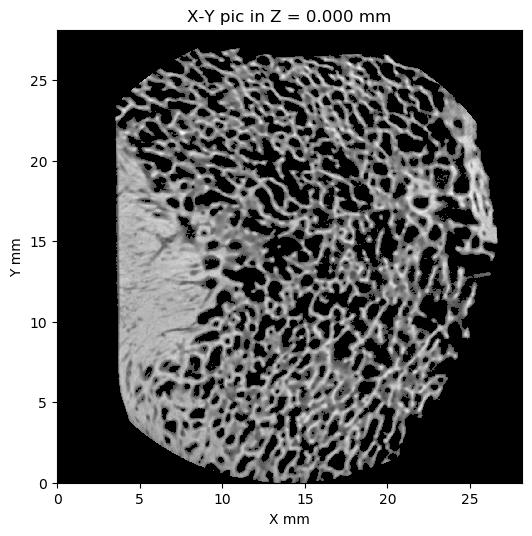

In [4]:
dcm.set_threshold()

In [5]:
params = {
    'th_skin':2,'th_ct':0.3,
    'n_sp':1.,'n_tr':1.37,'n_ct':1.37,'n_skin':1.37,'n_air':1.,
    'ma_sp':0.0001,'ma_tr':0.011,'ma_ct':0.011,'ma_skin':0.037,
    'ms_sp':0.0001,'ms_tr':19.1,'ms_ct':19.1,'ms_skin':18.8,
    'g_sp':0.99,'g_tr':0.93,'g_ct':0.93,'g_skin':.93,
    }
dcm.set_params(params)
dcm.model.get_params()

sp      tr      ct    skin  air
n   1.0000   1.370   1.370   1.370  1.0
ma  0.0001   0.011   0.011   0.037  0.0
ms  0.0001  19.100  19.100  18.800  0.0
g   0.9900   0.930   0.930   0.930  0.0
th  0.0000   0.000   0.300   2.000  0.0

In [6]:
monte_params = {
    'nPh':10**4,
    'model_type':'liner',
    'd_beam':0.54,
    'fluence_mode':'3D',
    'nr':100,'nz':50,'dr':0.1,'dz':0.1,   
}
dcm.set_monte_params(**monte_params)

Memory area size for fluence storage: 8 Mbyte


In [7]:
dcm.build()

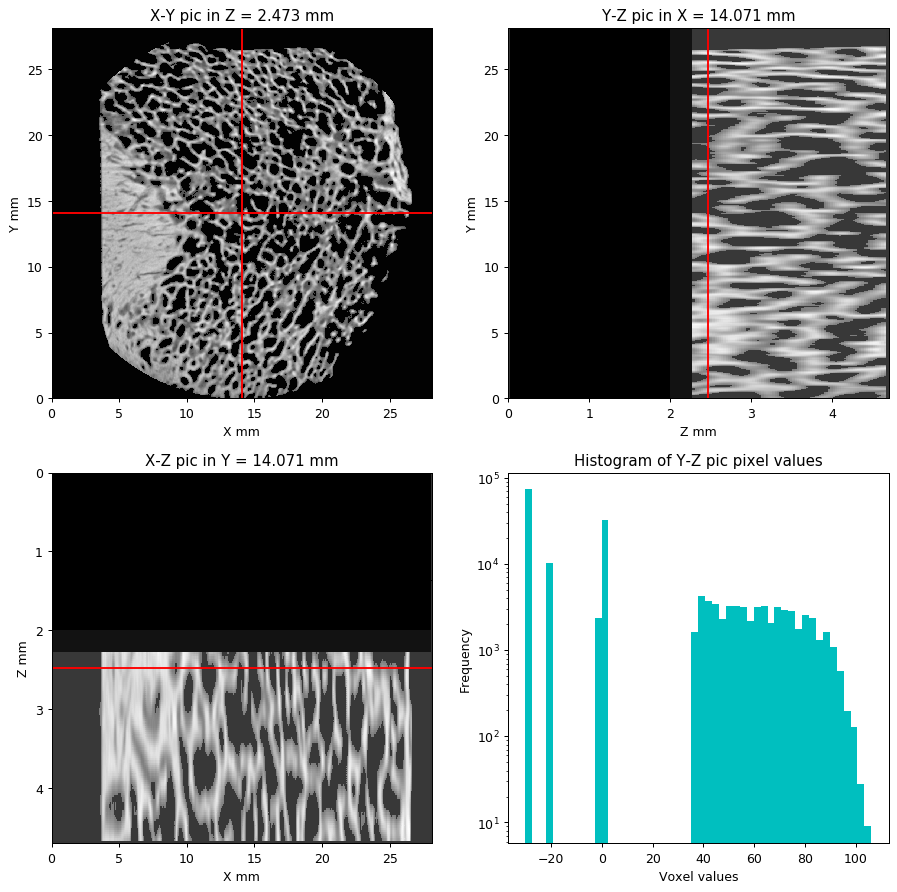

In [8]:
dcm.display_cross_section(image = dcm.model.voxel_model,
                          xx = 512,yy = 512,zz = 90,
                          cmap = 'gray',hist_type = 'YZ')

TEM00を入力


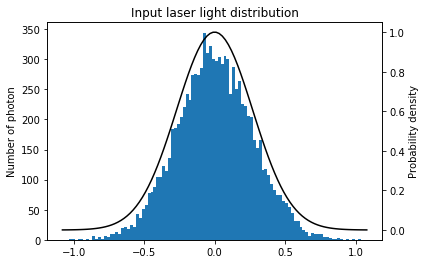

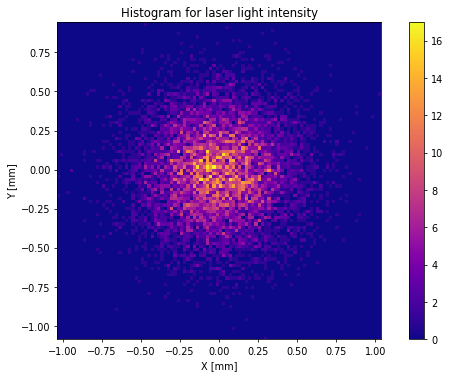


###### Start ######

Progress: 0.13 [％]
Calculation time: 0 minutes 0.068 seconds.

Progress: 0.53 [％]
Calculation time: 0 minutes 0.155 seconds.

Progress: 1.39 [％]
Calculation time: 0 minutes 0.344 seconds.

Progress: 3.57 [％]
Calculation time: 0 minutes 0.738 seconds.

Progress: 8.64 [％]
Calculation time: 0 minutes 1.516 seconds.

Progress: 18.3 [％]
Calculation time: 0 minutes 4.079 seconds.

Progress: 33.65 [％]
Calculation time: 0 minutes 9.697 seconds.

Progress: 55.47 [％]
Calculation time: 0 minutes 20.620 seconds.

Progress: 80.32 [％]
Calculation time: 0 minutes 37.048 seconds.

Progress: 96.67 [％]
Calculation time: 0 minutes 58.710 seconds.

Progress: 99.88 [％]
Calculation time: 1 minutes 14.853 seconds.

Progress: 99.98 [％]
Calculation time: 1 minutes 21.429 seconds.

Progress: 99.99 [％]
Calculation time: 1 minutes 28.475 seconds.


###### Finish ######
Maximum step number: 12125
######
Mean Rd 0.494963
Mean Tt 0.146903

Calculation time: 1 minutes 35.389 seconds.


In [9]:
dcm.start()

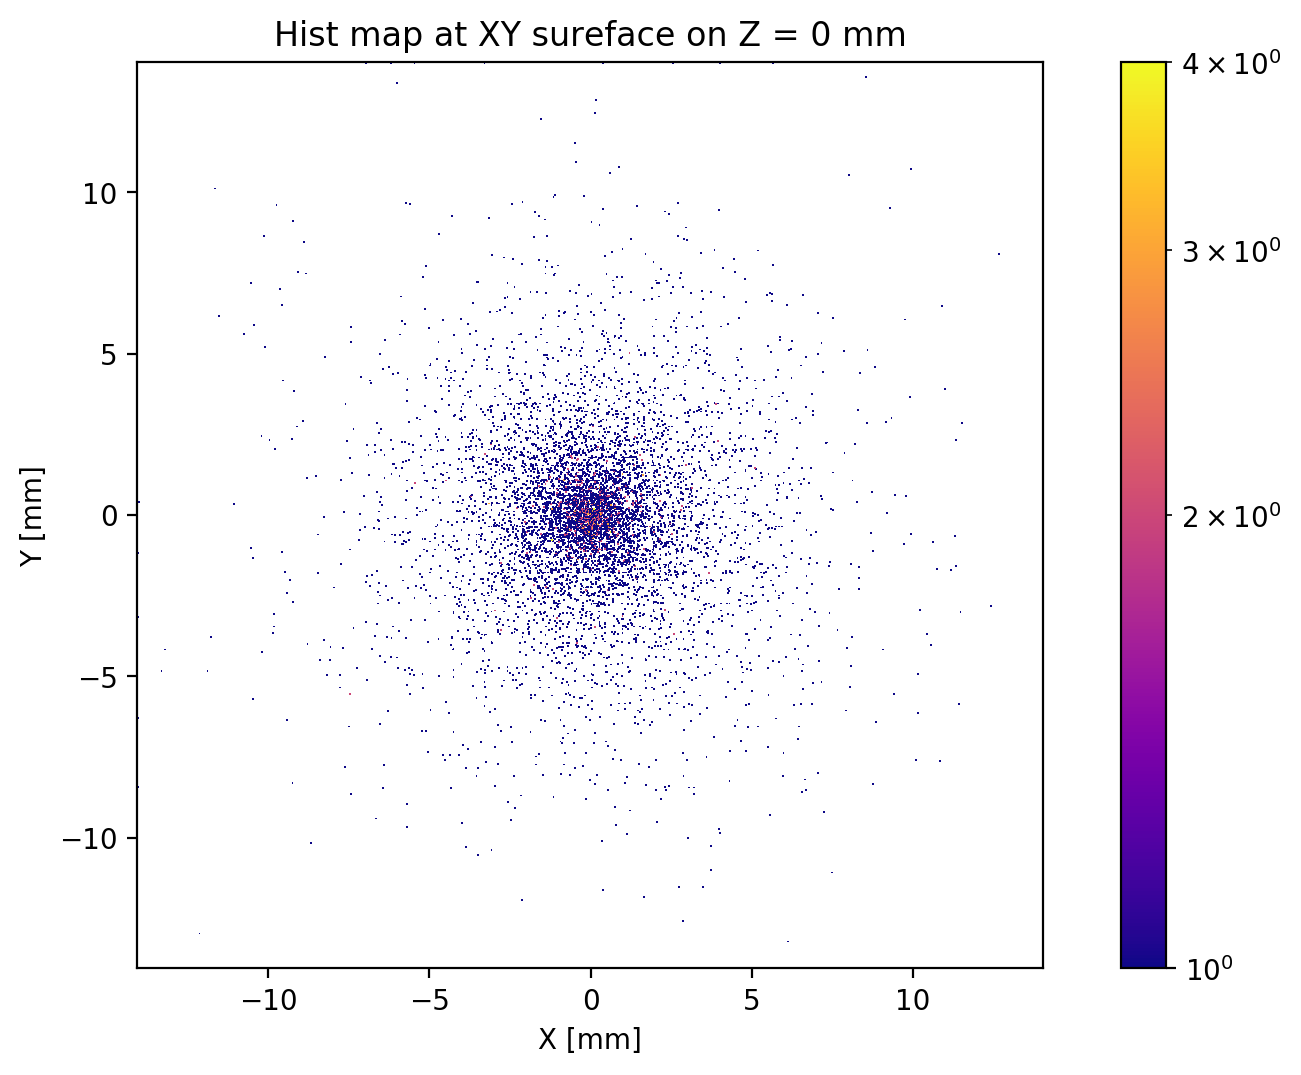

In [10]:
dcm.display_histmap()

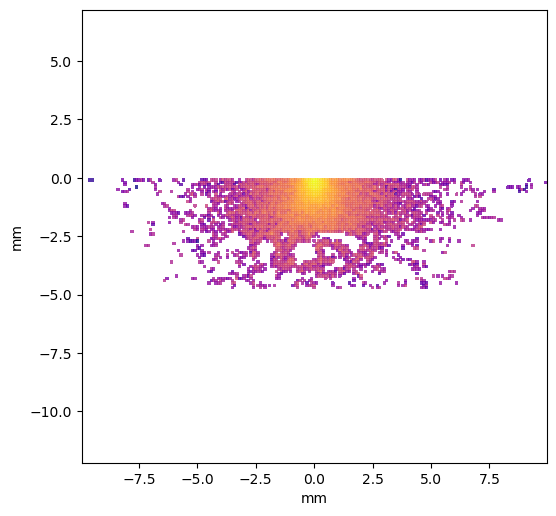

In [11]:
fl = dcm.get_fluence()
import matplotlib.pyplot as plt
from matplotlib import colors
plt.figure(figsize=(6,6),dpi=100)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.get_cmap("plasma"))
plt.pcolormesh(fl['r'],fl['z']*-1,fl["Arz"][:,100,:].T,norm=colors.LogNorm(),alpha = 0.8)
plt.xlabel("mm")
plt.ylabel("mm")
plt.show()

In [12]:
dcm.save_result()

Monte Carlo results saved in 
-> test_LID.pkl.bz2

Calculation conditions are saved in
-> test_info.json



TypeError: bad operand type for unary ~: 'str'

In [14]:
a = "A"
if a :
    print('AA')

AA


In [19]:
res = dcm.getResult()

In [21]:
import pickle
import time
import bz2
def saveFile(res,fname = "test"):
    def calTime(end, start):
        elapsed_time = end - start
        q, mod = divmod(elapsed_time, 60)
        if q < 60:
            print('Calculation time: %d minutes %0.3f seconds.' % (q, mod))
        else:
            q2, mod2 = divmod(q, 60)
            print('Calculation time: %d h %0.3f minutes.' % (q2, mod2))
    start_ = time.time()
    with bz2.open(fname+".pkl.bz2", 'wb') as fp:
        fp.write(pickle.dumps(res))
    calTime(time.time(), start_)
saveFile(res,fname = "../dicom9_2")

Calculation time: 0 minutes 38.321 seconds.


In [22]:
import inspect
inspect.getmembers(dcm)

[('ConstPixelDims', (1024, 1024, 1095)),
 ('ConstPixelSpacing', [0.0274828696451, 0.0274828696451, 0.0274828696451]),
 ('RTInterface',
  <bound method BaseVoxelMonteCarlo.RTInterface of <pymopt.voxel._classes.VoxelDicomModel object at 0x00000217F1905588>>),
 ('Rd_index',
  array([       0,        1,        2, ..., 10006945, 10006953, 10006954],
        dtype=int64)),
 ('Rdw', 0.51561405),
 ('Tt_index',
  array([    5518,     5620,     5648, ..., 10006951, 10006952, 10006955],
        dtype=int64)),
 ('Ttw', 0.0133972421875),
 ('__abstractmethods__', frozenset()),
 ('__class__', pymopt.voxel._classes.VoxelDicomModel),
 ('__delattr__',
  <method-wrapper '__delattr__' of VoxelDicomModel object at 0x00000217F1905588>),
 ('__dict__',
  {'model_type': 'binary',
   'nPh': 10000000,
   'f_bit': 'float32',
   'vectorTh': 0.99999,
   'v_result': array([[-0.61642504, -0.07013509,  0.0636982 , ...,  0.656116  ,
           -0.05765006,  0.15082228],
          [-0.1180288 , -0.4777176 , -0.94849855,

In [77]:
start_ = time.time()
with bz2.open("../dicom9.pkl.bz2", 'rb') as fp: 
    data = pickle.loads(fp.read())
calTime(time.time(), start_)

Calculation time: 0 minutes 14.421 seconds.


In [78]:
data

{'p': array([[-3.96082038e-03,  5.21204760e-03, -1.71981028e-05, ...,
          1.54815400e+00,  1.40300045e+01, -5.10411072e+00],
        [ 3.07084643e-03, -1.10586046e-03, -3.25214816e-04, ...,
          9.05560589e+00, -5.05122042e+00,  9.05560589e+00],
        [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          1.62564812e+01,  1.84103127e+01,  5.50972509e+00]], dtype=float32),
 'v': array([[-0.17939807,  0.28964645, -0.01880486, ..., -0.5936562 ,
          0.97822344, -0.05526607],
        [ 0.13908835, -0.06145542, -0.35559845, ...,  0.8034435 ,
         -0.14209321,  0.93844616],
        [-0.97389466, -0.9551587 , -0.9344497 , ..., -0.0452881 ,
         -0.15128931, -0.3409757 ]], dtype=float32),
 'w': array([9.7371078e-01, 9.7371078e-01, 9.7371078e-01, ..., 1.4131726e-04,
        1.2761509e-04, 1.1408322e-04], dtype=float32)}

In [16]:
index = dcm.getRdTtIndex()

In [17]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

In [27]:
nn = 100
dr = 0.1
nPh = 10**7
p_result = res["p"]
v_result = res["v"]
w_result = res["w"]
Tt_indexA = index['Tt']

Rd_indexA = index['Rd']
alpha,Rdr = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)

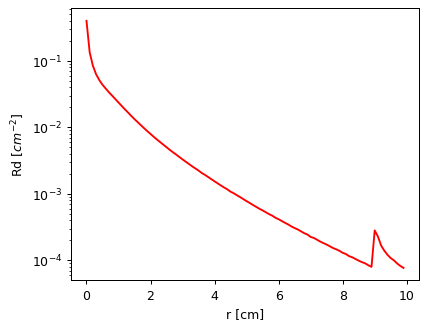

In [29]:


plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha,Rdr,'-',c = 'red')
plt.yscale('log')
#plt.xlim(0,1)
#plt.legend()
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

In [ ]:
res['p'][]

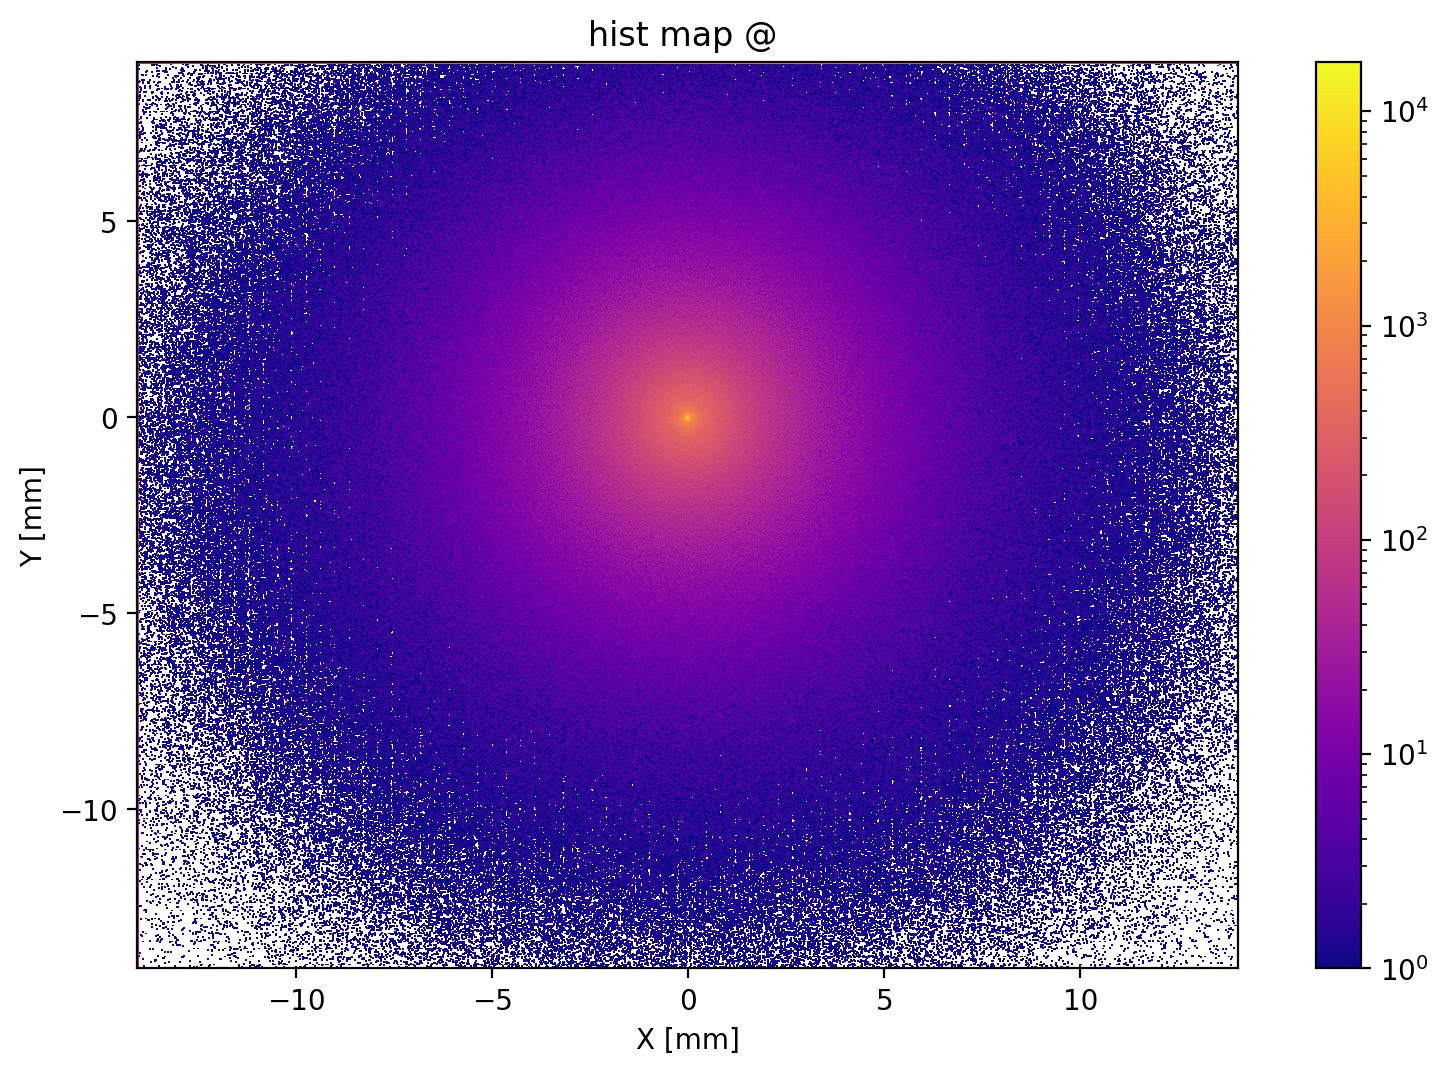

In [15]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
res = dcm.getResult()
fig = plt.figure(figsize=(10,6),dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
Rd_index = np.where(res['v'][2]<0)[0]
y = res['p'][1,Rd_index]
x = res['p'][0,Rd_index]
H = ax.hist2d(x,y, bins=2**10,cmap="plasma",norm=colors.LogNorm())
ax.set_title('hist map @ ')
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
fig.colorbar(H[3],ax=ax)
plt.show()

In [ ]:
dcm.model.get_params()